In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r'C:\Users\rajku\Documents\OneDrive\Desktop\MSc Data Analytics\Trimester-4\NLP\Labs\Lab9\SPAMtextData.csv', encoding = "latin")
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [10]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [15]:
print(df['Category'].value_counts())
print()
print()
print()
print(df['Category'].value_counts(normalize=True))

ham     4825
spam     747
Name: Category, dtype: int64



ham     0.865937
spam    0.134063
Name: Category, dtype: float64


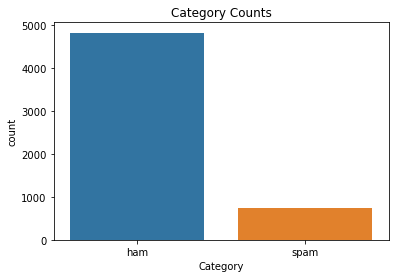

In [17]:
sns.countplot(df['Category'])
plt.title("Category Counts")
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder # ham = 0 : spam = 1 
le = LabelEncoder()
df['Outcome'] = le.fit_transform(df['Category'])
df.head()

,Category,Message,Outcome
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Category
ham     14.310259
spam    23.812584
Name: word_count, dtype: float64


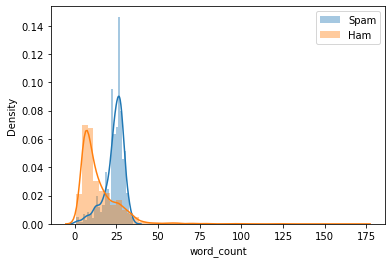

In [20]:
# Storing the number of words in each messages
df['word_count'] = df['Message'].str.split().str.len()

# Printing the average number of words in each category
print(df.groupby('Category')['word_count'].mean())

# Visualizing the distribution of word counts in each category
sns.distplot(df[df['Category']=='spam']['word_count'], label='Spam')
sns.distplot(df[df['Category']=='ham']['word_count'], label='Ham'),
plt.legend()
plt.show()

# Tokenization

In [21]:
# Making the letters lower case and tokenizing the words
tokenized_messages = df['Message'].str.lower().apply(word_tokenize)

print(tokenized_messages)

0       [go, until, jurong, point, ,, crazy, .., avail...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568     [will, ã¼, b, going, to, esplanade, fr, home, ?]
5569    [pity, ,, *, was, in, mood, for, that, ., so, ...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                  [rofl, ., its, true, to, its, name]
Name: Message, Length: 5572, dtype: object


In [22]:
# Defining a function to return only alphanumeric tokens
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        if str.isalpha(token) or token in ['n\'t','won\'t']:
            if token=='n\'t':
                alpha.append('not')
                continue
            elif token == 'won\'t':
                alpha.append('wont')
                continue
            alpha.append(token)
    return alpha

In [24]:
# Apply our function to tokens
tokenized_messages = tokenized_messages.apply(alpha)
print(tokenized_messages)

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, a, wkly, comp, to, win, fa, ...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, do, not, think, he, goes, to, usf, he...
                              ...                        
5567    [this, is, the, time, we, have, tried, contact...
5568            [will, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, any, othe...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: Message, Length: 5572, dtype: object


In [25]:
# Defining a function to remove stop words
def remove_stop_words(tokens):
    """This function removes all stop words in terms of nltk stopwords"""
    no_stop = []
    for token in tokens:
        if token not in stopwords.words('english'):
            no_stop.append(token)
    return no_stop

# Applying our function to tokens
tokenized_messages = tokenized_messages.apply(remove_stop_words)

print(tokenized_messages)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, wkly, comp, win, fa, cup, final,...
3           [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, goes, usf, lives, around, though]
                              ...                        
5567    [time, tried, contact, u, pound, prize, claim,...
5568                      [b, going, esplanade, fr, home]
5569                            [pity, mood, suggestions]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                   [rofl, true, name]
Name: Message, Length: 5572, dtype: object


In [26]:
# Defining a function to lemmatization
def lemmatize(tokens):
    """This function lemmatize the messages"""
    # Initializing the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # Creating the lemmatized list
    lemmatized = []
    for token in tokens:
            # Lemmatize and append
            lemmatized.append(lemmatizer.lemmatize(token))
    return " ".join(lemmatized) # Rejoining thee tokens

# Applying our function to tokens
tokenized_messages = tokenized_messages.apply(lemmatize)

print(tokenized_messages)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object


In [27]:
# Replacing the columns with tokenized messages
df['Message'] = tokenized_messages

# Display the first five rows
display(df.head())

,Category,Message,Outcome,word_count
0,ham,go jurong point crazy available bugis n great ...,0,20
1,ham,ok lar joking wif u oni,0,6
2,spam,free entry wkly comp win fa cup final tkts may...,1,28
3,ham,u dun say early hor u c already say,0,11
4,ham,nah think go usf life around though,0,13


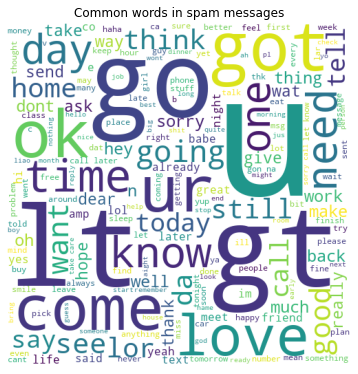

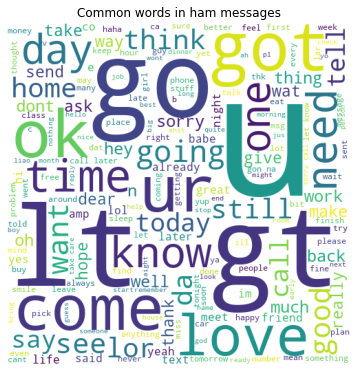

In [28]:
# Getting the spam messages
spam = df[df['Category']=='spam']['Message'].str.cat(sep=', ')

# Getting the ham messages
ham = df[df['Category']=='ham']['Message'].str.cat(sep=', ')

# Initializing the word cloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')

# Generating the world clouds for each type of message
spam_wc = wc.generate(spam)
ham_wc = wc.generate(ham)


# ploting the world cloud for spam                     
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(spam_wc) 
plt.axis("off") 
plt.title("Common words in spam messages")
plt.tight_layout(pad = 0) 
plt.show() 

# ploting the world cloud for spam                       
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(ham_wc) 
plt.axis("off")
plt.title("Common words in ham messages")
plt.tight_layout(pad = 0) 
plt.show() 

In [30]:
# Model Building

X = df['Message']
y = df['Outcome']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Vectorization

In [32]:
# Creating the tf-idf vectorizer
vectorizer = TfidfVectorizer()

# First fitting the vectorizer with our training set
tfidf_train = vectorizer.fit_transform(X_train)

# Now we can fit our test data with the same vectorizer
tfidf_test = vectorizer.transform(X_test)

In [33]:
print(tfidf_train)

  (0, 3586)	0.7432632887053837
  (0, 994)	0.46721873460982316
  (0, 5636)	0.4788176455525142
  (1, 3523)	0.23257286362201388
  (1, 2193)	0.18667250152009557
  (1, 5731)	0.2928130785974902
  (1, 784)	0.18138781152400182
  (1, 1449)	0.1606223323342959
  (1, 2772)	0.5390179646516298
  (1, 2907)	0.2834272230326338
  (1, 5624)	0.4458015795649287
  (1, 2895)	0.17736001083145603
  (1, 1084)	0.19658386963761096
  (1, 2006)	0.2928130785974902
  (1, 5410)	0.20290631807274365
  (2, 2308)	0.6245033260166466
  (2, 2987)	0.7810221480816957
  (3, 4237)	0.21111090832227752
  (3, 4532)	0.3505683374073174
  (3, 3265)	0.31938716124516775
  (3, 3260)	0.21111090832227752
  (3, 3134)	0.2581637286956844
  (3, 2065)	0.33098744281530473
  (3, 3183)	0.22311643849804982
  (3, 4497)	0.398181552411739
  :	:
  (4453, 3439)	0.378907811524373
  (4453, 5616)	0.21329448750696012
  (4453, 5296)	0.21565818198481654
  (4453, 4800)	0.2380910650497707
  (4453, 231)	0.24109170047632003
  (4453, 2120)	0.1634797583508718
  (44

In [34]:
print(tfidf_test)

  (0, 5488)	0.2792893856120213
  (0, 4227)	0.2977968045080212
  (0, 3964)	0.26289305944014
  (0, 3784)	0.4037617315905327
  (0, 3617)	0.2646285944492278
  (0, 3261)	0.3702736648507321
  (0, 2919)	0.2418611952046792
  (0, 2843)	0.24739036544167334
  (0, 2225)	0.24982043848070476
  (0, 1952)	0.3533338745368873
  (0, 762)	0.25807492394245857
  (0, 748)	0.1431459060653705
  (1, 5871)	0.49894464125945875
  (1, 4266)	0.7703006538873456
  (1, 2109)	0.3971034469495299
  (2, 4587)	0.3333123714765464
  (2, 4372)	0.29394137637784634
  (2, 4074)	0.2746947355444796
  (2, 2907)	0.19185200051075676
  (2, 2877)	0.2814501813305847
  (2, 1742)	0.3964105797852294
  (2, 1514)	0.5093932772062464
  (2, 1195)	0.3393901511053723
  (2, 114)	0.2814501813305847
  (3, 5163)	0.4416900891498309
  :	:
  (1111, 4590)	0.41725833470528534
  (1111, 2888)	0.28751708844825513
  (1111, 2857)	0.3508417084486587
  (1111, 2133)	0.19567834462380282
  (1111, 2109)	0.2151039625160722
  (1111, 1514)	0.26809147055598576
  (1111, 1

In [35]:
# Initializinng the Multinomial Naive Bayes classifier
nb = MultinomialNB()

# Fitting the model
nb.fit(tfidf_train, y_train)

# Print the accuracy score
print("Accuracy:",nb.score(tfidf_test, y_test))

Accuracy: 0.9605381165919282


In [36]:
# Predicting the labels
y_pred = nb.predict(tfidf_test)

# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n")
print(cm)

# Print the Classification Report
cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)

Confusion Matrix

[[966   0]
 [ 44 105]]


Classification Report

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.70      0.83       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



# Conclusion

In [37]:
# According to confusion matrix and classification report our model is perfect to detect spams but not hams.
# ham = 0 : spam = 1